# Credit Card Application Data with Seaborn

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("C:/Users/Imy Hull/datasets/application_record.csv")

In [11]:
df.shape

(438557, 18)

In [5]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

# Scatterplot of Days Since Birth Against Days Employed

In [16]:
# Create new dataframe of those who are employed (those with days employed showing a negative number)
# Convert negative numbers to positive
employed = df[df["DAYS_EMPLOYED"] < 0]
employed["DAYS_EMPLOYED"] = employed["DAYS_EMPLOYED"]*-1
employed["DAYS_BIRTH"] = employed["DAYS_BIRTH"]*-1

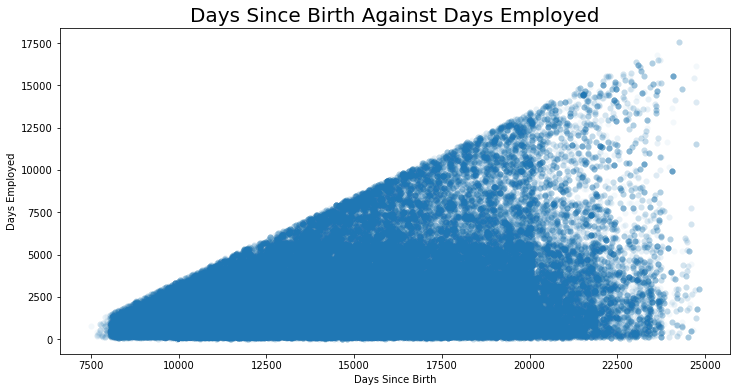

In [31]:
# Create scatterplot
plt.figure(figsize = (12,6))
sns.scatterplot(data = employed, x = "DAYS_BIRTH", y = "DAYS_EMPLOYED", alpha = 0.05, linewidth =0)
plt.xlabel("Days Since Birth")
plt.ylabel("Days Employed")
plt.title("Days Since Birth Against Days Employed", fontsize = 20);

# Distribution of Customer Age

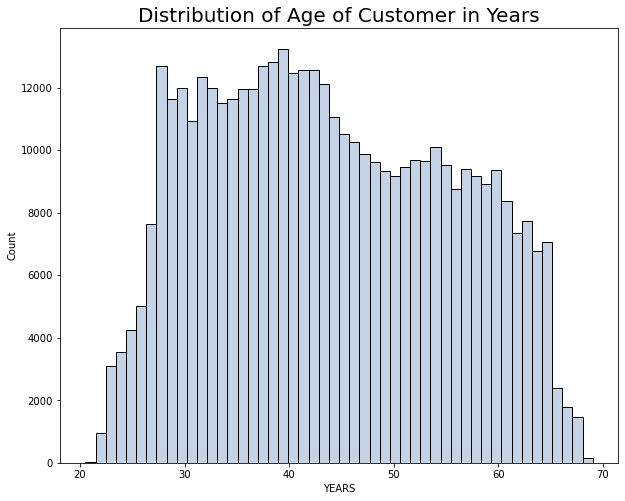

In [39]:
# Get age in years and convert to positive
plt.figure(figsize = (10,8))
df["YEARS"] = -1*df["DAYS_BIRTH"]/365
sns.histplot(data = df, x = "YEARS",bins = 50, color = "lightsteelblue")
plt.title("Distribution of Age of Customer in Years", fontsize = 20);

# Income by Family Status and Property Ownership

In [41]:
# Find bottom half of income earners
df.shape

(438557, 19)

In [53]:
n = df.shape[0]

219278.5

In [54]:
bottom_half = df.nsmallest(n = 219279,columns = "AMT_INCOME_TOTAL")

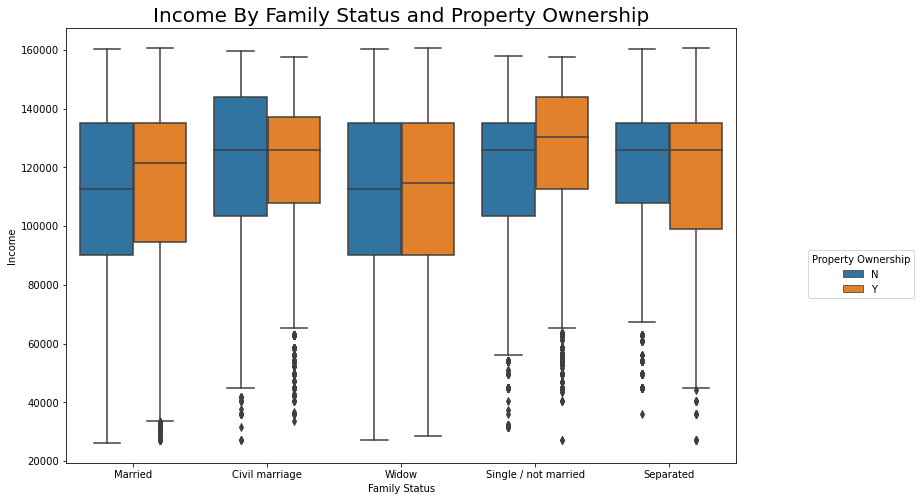

In [68]:
plt.figure(figsize = (12,8))
sns.boxplot(data = bottom_half, y = "AMT_INCOME_TOTAL", x = "NAME_FAMILY_STATUS", hue = "FLAG_OWN_REALTY")
plt.title("Income By Family Status and Property Ownership", fontsize = 20)
plt.xlabel("Family Status")
plt.ylabel("Income")
plt.legend(bbox_to_anchor = (1.1,0.5),title = "Property Ownership");

# Correlation

In [73]:
df.corr()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,YEARS
ID,1.000000,-0.005178,0.011179,-0.004994,-0.002467,NaN,-0.023319,-0.018992,0.032875,-0.001862,0.004994
CNT_CHILDREN,-0.005178,1.000000,0.019177,0.349088,-0.241535,NaN,0.038418,-0.038266,0.028457,0.884781,-0.349088
AMT_INCOME_TOTAL,0.011179,0.019177,1.000000,0.053775,-0.141291,NaN,-0.033635,0.004444,0.112139,0.011454,-0.053775
DAYS_BIRTH,-0.004994,0.349088,0.053775,1.000000,-0.617908,NaN,0.171829,-0.037984,0.096752,0.306179,-1.000000
DAYS_EMPLOYED,-0.002467,-0.241535,-0.141291,-0.617908,1.000000,NaN,-0.232208,0.004868,-0.074372,-0.234373,0.617908
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,-0.023319,0.038418,-0.033635,0.171829,-0.232208,NaN,1.000000,0.290066,-0.060915,0.049777,-0.171829
FLAG_PHONE,-0.018992,-0.038266,0.004444,-0.037984,0.004868,NaN,0.290066,1.000000,-0.001170,-0.024213,0.037984
FLAG_EMAIL,0.032875,0.028457,0.112139,0.096752,-0.074372,NaN,-0.060915,-0.001170,1.000000,0.022054,-0.096752
CNT_FAM_MEMBERS,-0.001862,0.884781,0.011454,0.306179,-0.234373,NaN,0.049777,-0.024213,0.022054,1.000000,-0.306179


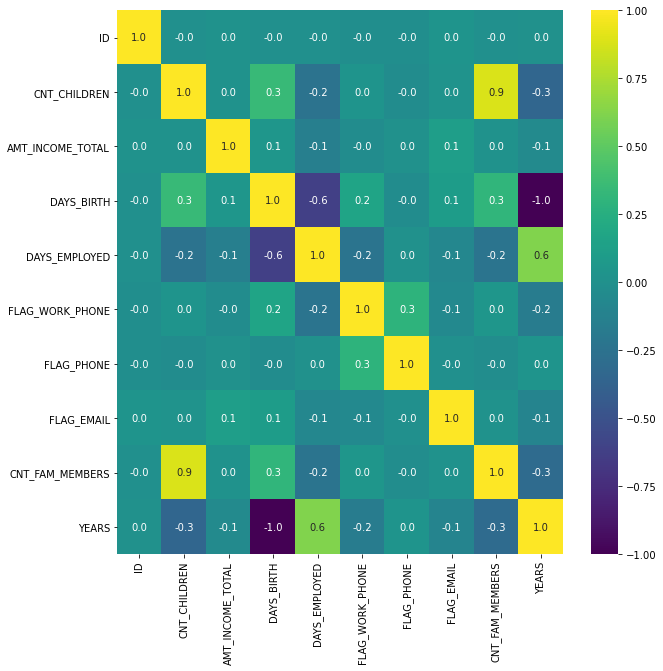

In [85]:
plt.figure(figsize = (10,10))
sns.heatmap(df.drop("FLAG_MOBIL",axis = 1).corr(),cmap = "viridis",annot = True,fmt = ".1f");